In [1]:
import sys
sys.path.append('../wamuu')
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from instance import Instance
from utils import sweep_groups, sort_group_by_subst_dist, prim, get_turb_out_power, put_cables

In [2]:
I = Instance(
    instance_dir='../data/raw',
    instance='n50_s01_t01_w01'
)

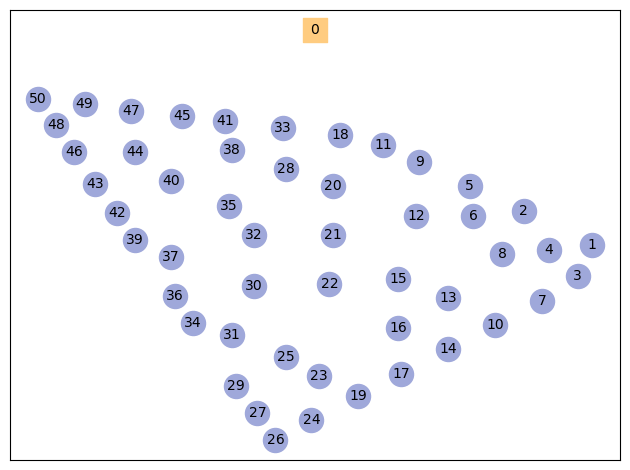

In [3]:
G = nx.DiGraph()
for i in range(I.n+1):
    G.add_node(i, pos=I.nodes[i])
pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0],
                       node_color='#FFCC80',
                       node_shape='s')
nx.draw_networkx_nodes(G, pos,
                       nodelist=range(1, I.n+1),
                       node_color='#9FA8DA')
nx.draw_networkx_labels(G, pos,
                        font_size=10)
plt.tight_layout()
plt.show()

In [4]:
groups = sweep_groups(I.n,
                      starting_index=9,
                      clockwise=True,
                      tpg = I.n//I.C + 1)
groups = [sort_group_by_subst_dist(group, I.dist) for group in groups]
edges_group = [prim(group, I.dist, group[0]) for group in groups]
powers = [get_turb_out_power(groups[i], edges_group[i]) for i in range(len(groups))]
power = dict()
for p in powers:
    power |= p

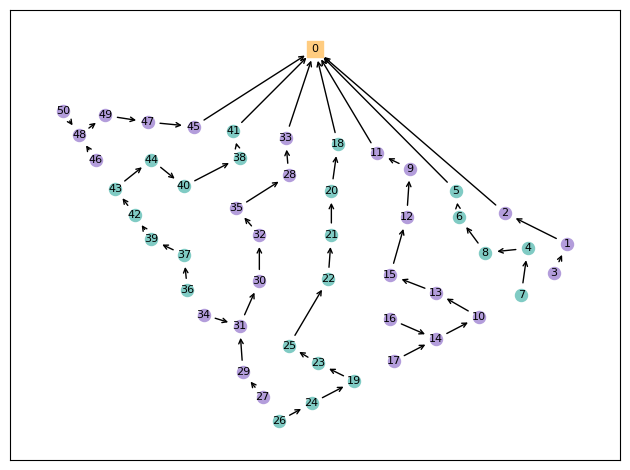

In [5]:
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0],
                       node_color='#FFCC80',
                       node_size=120,
                       node_shape='s')
color = ['#B39DDB', '#80CBC4']
for i in range(len(groups)):
    nx.draw_networkx_nodes(G, pos,
                           nodelist=groups[i],
                           node_color=color[i%2],
                           node_shape='.')
edgelist = []
for edges in edges_group:
    edgelist.extend(edges)
for group in groups:
    edgelist.append([group[0], 0])
nx.draw_networkx_edges(G, pos,
                       edgelist,
                       arrowstyle='->',
                       arrowsize=8)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.tight_layout()
plt.show()

In [6]:
cables_distribution = put_cables(power, I.cables)
print(cables_distribution)

{2: 0, 1: 0, 3: 0, 5: 0, 6: 0, 8: 0, 4: 0, 7: 0, 11: 2, 9: 2, 12: 1, 15: 1, 13: 0, 16: 0, 10: 0, 14: 0, 17: 0, 18: 2, 20: 2, 21: 1, 22: 1, 25: 0, 23: 0, 19: 0, 24: 0, 26: 0, 33: 2, 28: 2, 35: 1, 32: 1, 30: 0, 34: 0, 31: 0, 29: 0, 27: 0, 41: 2, 38: 2, 44: 1, 40: 1, 43: 0, 42: 0, 39: 0, 37: 0, 36: 0, 45: 1, 47: 0, 49: 0, 48: 0, 50: 0, 46: 0}


/tmp/ipykernel_8548/180951681.py:21: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


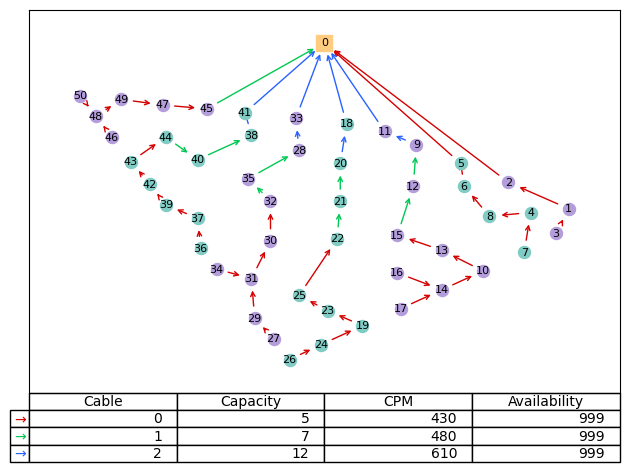

In [7]:
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0],
                       node_color='#FFCC80',
                       node_size=120,
                       node_shape='s')
color = ['#B39DDB', '#80CBC4']
for i in range(len(groups)):
    nx.draw_networkx_nodes(G, pos,
                           nodelist=groups[i],
                           node_color=color[i%2],
                           node_shape='.')
edgelist = []
for edges in edges_group:
    edgelist.extend(edges)
for group in groups:
    edgelist.append([group[0], 0])
edgecolors = ['#D50000', '#00C853', '#2962FF', '#FFD600', '#C51162']
edge_color = [None for _ in edgelist]
for i in range(len(edgelist)):
    edge_color[i] = edgecolors[cables_distribution[edgelist[i][0]]]
nx.draw_networkx_edges(G, pos,
                       edgelist,
                       edge_color=edge_color,
                       arrowstyle='->',
                       arrowsize=8)
nx.draw_networkx_labels(G, pos, font_size=8)
table = plt.table(
    colLabels=['Cable', 'Capacity', 'CPM', 'Availability'],
    rowLabels=[r'$\to$' for _ in I.cables],
    cellText=[
        [i, I.cables[i]['capacity'], I.cables[i]['cpm'], I.cables[i]['availability']] for i in range(len(I.cables))
    ]
)
for i in range(len(I.cables)):
    table[(i+1, -1)].get_text().set_color(edgecolors[i])
plt.tight_layout()
plt.show()